**LOGISTIC REGRESSION - RAIN IN AUSTRALIA**

In this session we will explore the rain in Australia dataset. This dataset contains daily weather observations from numerous Australian weather stations for approximately 10 years (22 data columns+target variable).

The observations were gathered from a multitude of weather stations. You can access daily observations from http://www.bom.gov.au/climate/data.

![alt text](NASAAus.jpeg "Satellite image of Austrlia with level of rain depicted")

<img src="rainAus.jpeg" width="400" height="200">

To accurately draw conclusions from the data, we must know and understand the input and target variables.

<u>Examples of what columns (representing variables) the dataset has</u>:
- "Date": The date of observation
- "Location":The common name of the location of the weather station
- "Rainfall":  The amount of rainfall recorded for the day in mm
- "Evaporation" : The so-called Class A pan evaporation (mm) - how much water evaporates in the 24 hours to 9am
- "Sunshine" : The number of hours of bright sunshine in the day.
- "WindGustDir": The direction of the strongest wind gust in the 24 hours to midnight (W=West, E=East, NW=North-west and similar)
- "WindGustSpeed" : The speed (km/h) of the strongest wind gust in the 24 hours to midnight
- "WindDir9am" : Direction of the wind at 9am (W=West, E=East, NW=North-west and similar)
- "WindDir3pm" : Direction of the wind at 3pm (W=West, E=East, NW=North-west and similar)
- "WindSpeed9am": Wind speed (km/hr) averaged over 10 minutes prior to 9am
- "WindSpeed3pm": Wind speed (km/hr) averaged over 10 minutes prior to 3am
- "MinTemp": The minimum temperature for the day in degrees celsius
- "MaxTemp": The maximum temperature for the day in degrees celsius
- "Humidity9am": Humidity (percent) at 9am
- "Pressure9am": Atmospheric pressure (hpa = hectoPascals or millibars) reduced to mean sea level at 9am
- "Humidity3am": Humidity (percent) at 3pm
- "Pressure3pm": Atmospheric pressure (hpa = hectoPascals or millibars) reduced to mean sea level at 3pm
- "Cloud9am": Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast.
- "Cloud3pm": Fraction of sky obscured by cloud at 3pm. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast.
- "Temp9am": Temperature (degrees C) at 9am
- "Temp3pm": Temperature (degrees C) at 3pm
- "RainToday": 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

The <u>target</u> (called **RainTomorrow**) means: did it rain the next day? The possible values are "Yes" or "No", with yes meaning that that there was at least 1mm of rain or more.

We will use **logistic regression model** to predict the RainTomorrow variable. 




**1. IMPORTING LIBRARIES**

In [1]:
#First we need to import the libraries with functions and data types/structures that we are going to use
#ToDo: discuss if you are familiar with the libraries and what the purpose of each one is
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import PrecisionRecallDisplay
from sklearn import metrics

**2. DATA PREPARATION**

**2.1. Importing Data**

In [2]:
#We also beed to load the dataset
#ToDo: load the data from csv file
data = pd.read_csv('./weatherAUS.csv')
#ToDo: look at a few entries to get a feeling for what the data is like
data.sample(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
22535,2013-01-17,NorfolkIsland,17.3,23.8,0.0,7.2,10.1,SSE,33.0,SSE,...,55.0,49.0,1012.9,1010.8,7.0,1.0,21.0,22.6,No,No
92631,2015-09-16,GoldCoast,15.4,27.3,0.0,NaN,NaN,NW,41.0,NW,...,66.0,75.0,1018.8,1014.6,NaN,NaN,21.7,23.3,No,Yes
86363,2015-03-12,Brisbane,20.9,29.9,0.0,8.0,10.0,E,28.0,SSE,...,65.0,46.0,1014.5,1011.8,7.0,2.0,26.2,28.5,No,No
35637,2015-01-16,SydneyAirport,21.1,29.1,0.0,8.2,12.9,ENE,35.0,WSW,...,62.0,56.0,1008.7,1005.5,3.0,2.0,25.2,27.9,No,No
70167,2016-11-12,Melbourne,13.2,25.5,2.0,4.8,4.5,NNW,50.0,NNE,...,79.0,36.0,997.1,995.7,7.0,6.0,18.8,23.7,Yes,Yes


**2.2. Exploring Data**

In [3]:
#In the random data points we see NaN. How common is that? 
#How we deal with these missing values depends on how many of them there are in out dataset.
#ToDo: calculate how many NaN there are overall
data.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

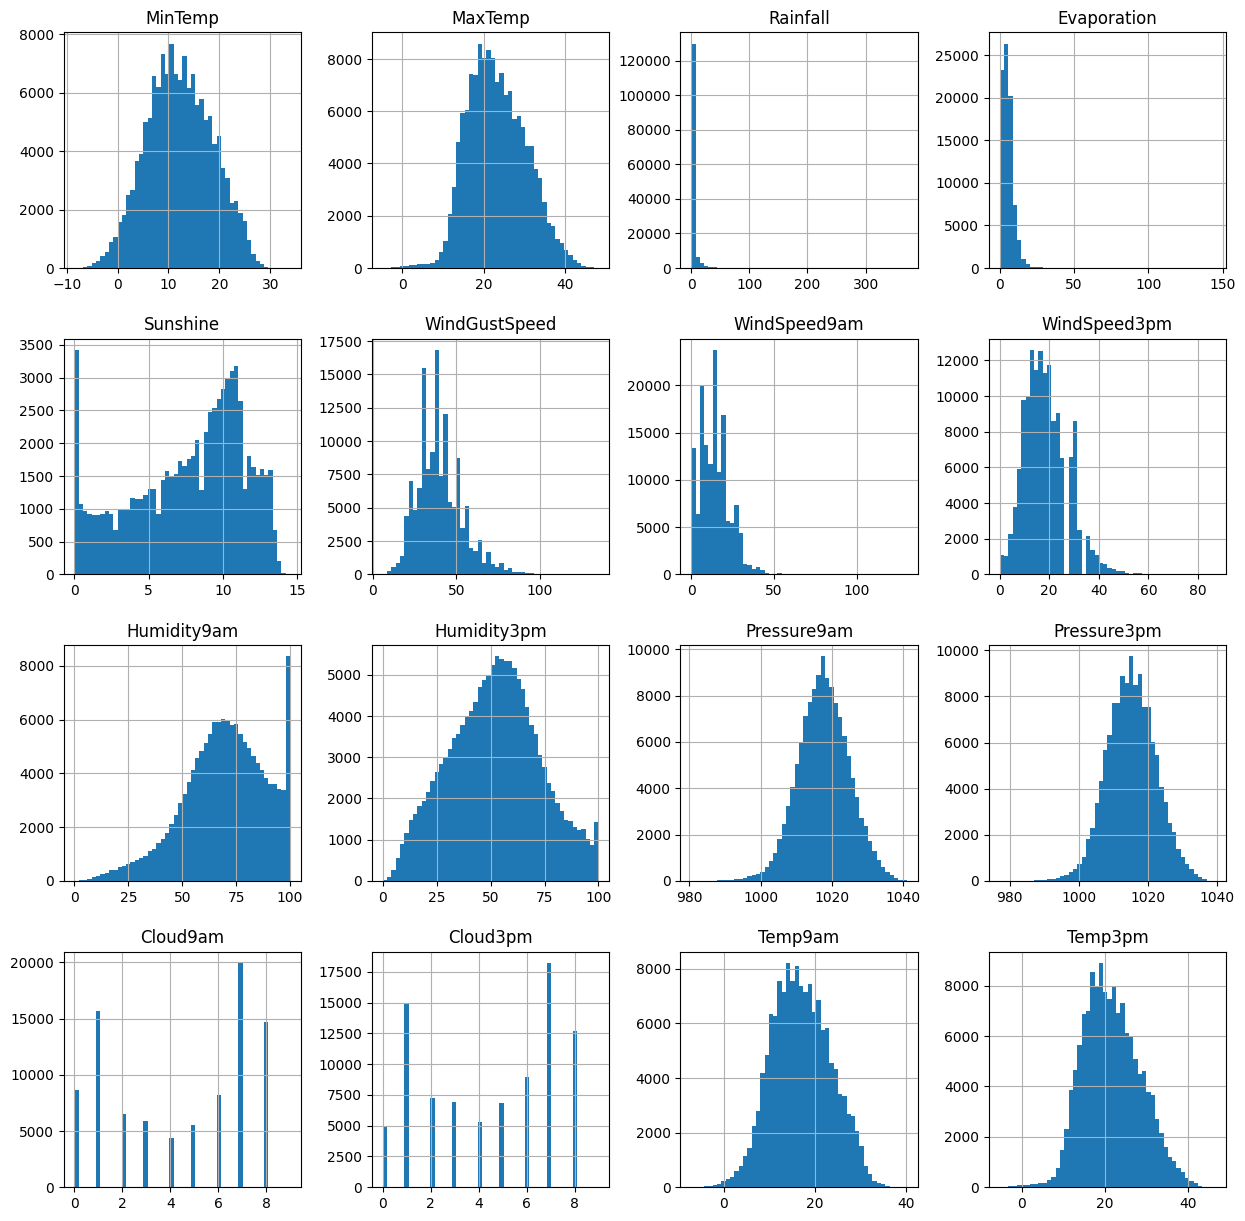

In [4]:
#To explore the range of values for each variable, we can create a histogram 
#ToDo: visualise histograms of some columns with calling a .hist() function from data
#Try parameters bins=50 and figsize=(15, 15) [size of resulting figure]
hist = data.hist(bins=50, figsize=(15, 15))

Not all column were visualised. Why?
The hist function only wok with numbers, so let's convert our strings to numbers.

In [5]:
#How predictive of our target value is each variable (column)? 
#To understand this, we calculate correlation
#Correlation - to which degree to 2 variables change together? 
#Example - temperature outside and how much water evaporates per given time are very connected
#We need to change strings to numbers to calculate the correlation
import copy

data_categorical = copy.deepcopy(data)

data_categorical['Location']=data_categorical['Location'].astype('category').cat.codes
data_categorical['RainToday']=data_categorical['RainToday'].astype('category').cat.codes
data_categorical['WindDir9am']=data_categorical['WindDir9am'].astype('category').cat.codes
data_categorical['WindDir3pm']=data_categorical['WindDir3pm'].astype('category').cat.codes
data_categorical['WindGustDir']=data_categorical['WindGustDir'].astype('category').cat.codes
data_categorical['RainTomorrow']=data_categorical['RainTomorrow'].astype('category').cat.codes

#ToDo: calculate the correlation for all the variables in the data_categorical with the 'RainTomorrow' target
data_categorical.corr()['RainTomorrow']

Location        -0.013112
MinTemp          0.074597
MaxTemp         -0.145877
Rainfall         0.224268
Evaporation     -0.109716
Sunshine        -0.408096
WindGustDir      0.050768
WindGustSpeed    0.206299
WindDir9am       0.039284
WindDir3pm       0.027859
WindSpeed9am     0.070565
WindSpeed3pm     0.072610
Humidity9am      0.233368
Humidity3pm      0.406050
Pressure9am     -0.226648
Pressure3pm     -0.208366
Cloud9am         0.291214
Cloud3pm         0.355419
Temp9am         -0.025140
Temp3pm         -0.176824
RainToday        0.329409
RainTomorrow     1.000000
Name: RainTomorrow, dtype: float64

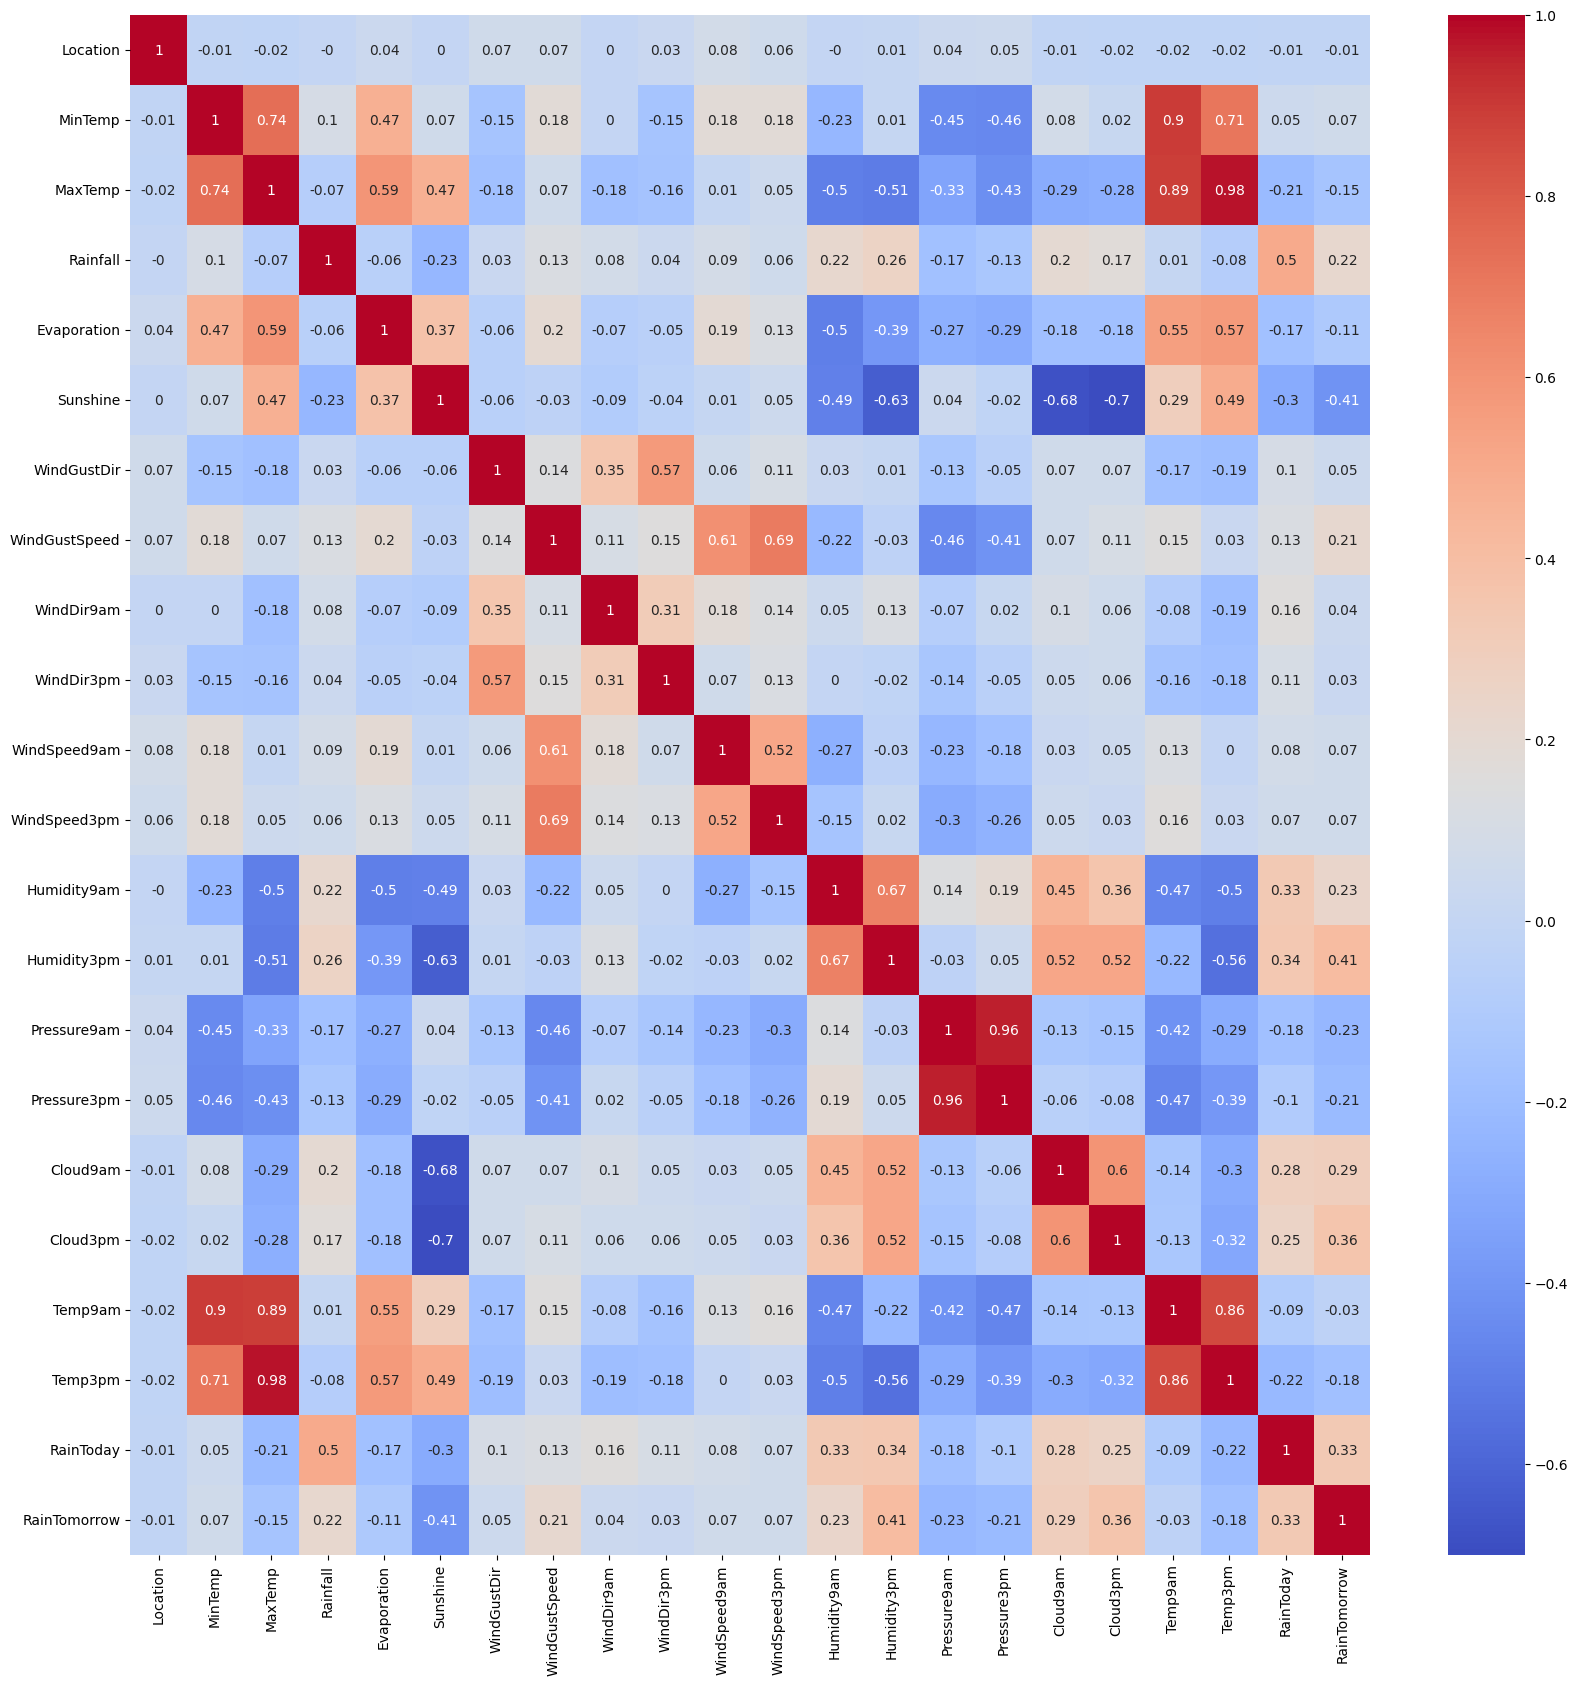

In [6]:
#The correlation can be presented in a more visual way as a matrix
#ToDo: create the variable named correlation_matrix
correlation_matrix = data_categorical.corr().round(2)
fig, ax = plt.subplots(figsize=(20,20))
#ToDo visualise the correlation matrix as a heatmap (sns.heatmap function with variable correlation_matrix as 
#data and variable ax as ax, annot=True (to enable the numbers inside squares of heatmap) and cmap='coolwarm')
sns.heatmap(data=correlation_matrix, annot=True, ax=ax, cmap='coolwarm') # annot = True to print the values inside the square
plt.show()

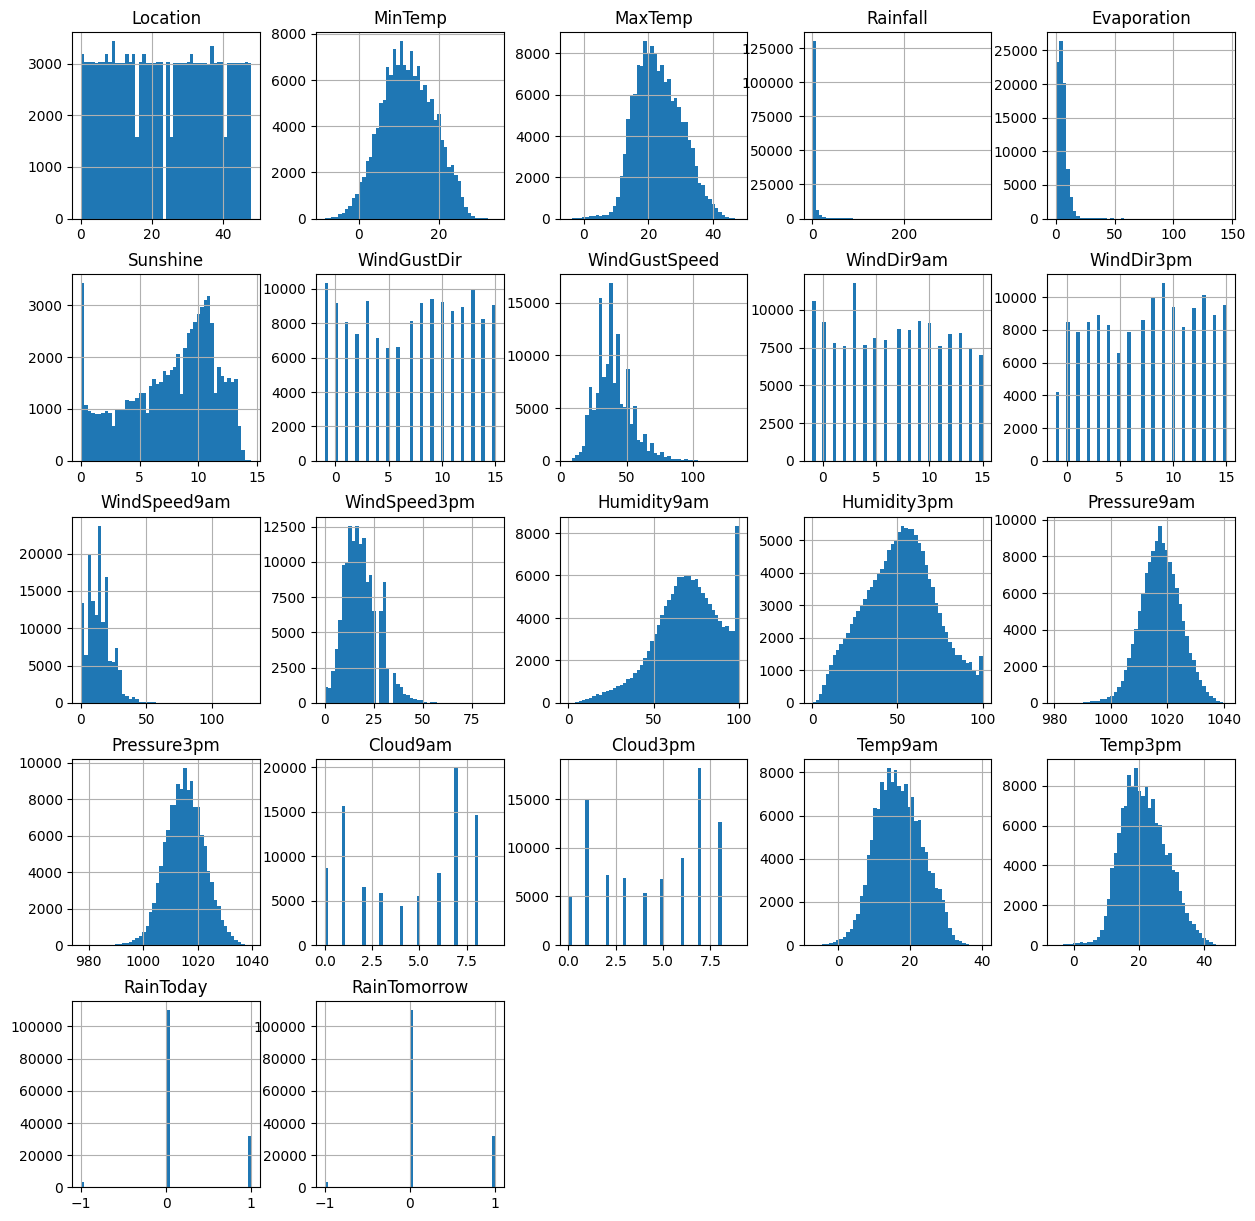

In [7]:
#To explore the range of values for each variable, we can create a histogram 
#ToDo: visualise histograms of some columns with calling a .hist() function from data_categorical
#Try parameters bins=50 and figsize=(15, 15) [size of resulting figure]
hist = data_categorical.hist(bins=50, figsize=(15, 15))

**2.3. Cleaning Data**

In [8]:
#??? Should we get rid of those columns?

# We see that not all columns are equally useful for predicting the probability of rain
# ToDo: Getting rid of the columns with objects which will not be used in our model:
#data.drop(['Date', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], axis=1, inplace=True)
data.drop(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], axis=1, inplace=True)
data.head(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


**Missing data imputation**

<u>Missing data imputation</u> - replacing missing data with an estimated value based on other available information, allowing to keep all data points (especially important in small datasets) 

<img src="miss_val.png" width="400" height="200">


Every subject in a randomly chosen sample can be replaced by a new subject that is randomly chosen from the same source population as the original subject, without compromising the conclusions. Imputation techniques are also based on this basic principle of replacement. *["Review: A gentle introduction to imputation of missing values", A. Rogier et al., 2006, Journal of Clinical Epidemiology 59 (2006) 1087e1091]*

The right type of missing value imputation to choose depends on the type of missing data.

<u>Types of missing data</u>:
1. **Missing completely at random**
- accidental breaking, deletion of data, corruption, contamination etc.
- can be correctly imputed by simplest methods
2. **Missing not at random**
- reason for missingness ... is related to *unobserved* ... characteristics
- almost impossible to correctly impute 
3. **Missing at random**
- reason for missingness is based on other *observed* ... characteristics
- missing data can ... be considered random conditional on these other patient characteristics that determined their missingness and that are available at the time of analysis 
- all simple techniques for handling missing data, i.e., complete and available case analyses, the indicator method and overall mean imputation, give biased results. 

Here we will use **mean value imputation** (for each variable, which is represented by a column in the dataset, the missing value will be replaced by the mean of that variable/column)

<img src="mean_imp_example.png" width="400" height="200">

Feel free to experiment and explore further!


In [9]:
#The simple algorithms often either cannot run on datasets with missing data, or ignore the samples with missing data
#ToDo: replace NaN values with mean values of each column:
data.fillna(data.mean(), inplace=True)
data.head(5)

/var/folders/rh/wqjw407133jfhj_bhjtl3tgj23ky7h/T/ipykernel_9950/4128306530.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.mean(), inplace=True)


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,5.468232,7.611178,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No
1,7.4,25.1,0.0,5.468232,7.611178,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No
2,12.9,25.7,0.0,5.468232,7.611178,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No
3,9.2,28.0,0.0,5.468232,7.611178,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No
4,17.5,32.3,1.0,5.468232,7.611178,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No


**2.4. Converting Predictions to Binary for Logistic Regression**

In [10]:
#The algorithm was programmed to deal with numbers, not strings
#ToDo: change that day and next days'predictions (strings "Yes" and "No") to 1 and 0:
data.RainToday = [1 if each == 'Yes' else 0 for each in data.RainToday]
data.RainTomorrow = [1 if each == 'Yes' else 0 for each in data.RainTomorrow]
data.sample(3)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
86204,20.0,25.8,0.0,5.468232,8.7,28.0,7.0,13.0,67.0,52.0,1022.6,1019.3,7.0,1.0,22.1,24.1,0,0
61895,13.2,29.9,0.0,5.800000,5.5,44.0,2.0,13.0,67.0,58.0,1004.8,1003.3,5.0,8.0,22.6,23.6,0,1
75081,7.2,19.7,0.2,2.000000,9.4,22.0,7.0,13.0,97.0,57.0,1023.3,1021.8,2.0,1.0,13.7,17.5,0,0


**2.5. Excluding Tomorrow's Prediction from the Dataset**

In [11]:
#The algorithm needs to know what is the target variable and what is the data
#ToDo: separate the data[x_data] and the target variable[y]
y = data.RainTomorrow.values
x_data = data.drop('RainTomorrow', axis=1)
x_data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,13.4,22.9,0.6,5.468232,7.611178,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0
1,7.4,25.1,0.0,5.468232,7.611178,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0
2,12.9,25.7,0.0,5.468232,7.611178,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0
3,9.2,28.0,0.0,5.468232,7.611178,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0
4,17.5,32.3,1.0,5.468232,7.611178,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0


**2.6. Data Normalization**

<u>Data normalization</u> - transforming the range of features to a common (usually standard) scale (often 0-1). 

**Motivation**: 
1. Normalized data enhances model performance and improves the accuracy of a model.
- all features contribute equally
- the trends and variations are more visible and easily identifiable
2. Makes the training more stable.

<img src="norm.png" width="400" height="200">

**Types of normalization:** <br>
1)<u>Min-Max Scaling</u> <br>

Min-max scaling is very often simply called ‘normalization.’ It transforms features to a specified range, typically between 0 and 1. The formula for min-max scaling is:<br>

**X_normalized** = (x - min(x)) / (max(x) - min(x)) <br>

That most often used technique works when:
- The approximate upper and lower bounds of the dataset is known, and the dataset has few or no outliers
- The data distribution is unknown or non-Gaussian, and the data is approximately uniformly distributed across the range

2) <u>Z-score normalization (standardization)</u><br>

Z-score normalization assumes a Gaussian (bell curve) distribution of the data and transforms features to have a mean (μ) of 0 and a standard deviation (σ) of 1. The formula for standardization is:

**X_standardized** = x−μ / σ

- This technique is particularly useful when dealing with algorithms that assume normally distributed data, such as many linear models. 

3)<u>Decimal scaling normalization</u>

The objective of decimal scaling normalization is to scale the feature values by a power of 10, ensuring that the largest absolute value in each feature becomes less than 1. It is useful when the range of values in a dataset is known, but the range varies across features. The formula for decimal scaling normalization is:

**X_decimal** = X / 10d

Where X is the original feature value, and d is the smallest integer such that the largest absolute value in the feature becomes less than 1.

- Decimal scaling normalization is advantageous when dealing with datasets where the absolute magnitude of values matters more than their specific scale.

4)<u>Log scaling normalization</u>

Log scaling normalization converts data into a logarithmic scale, by taking the log of each data point. It is particularly useful when dealing with data that spans several orders of magnitude. The formula for log scaling normalization is:

**X_log** = log(X)

- This normalization comes in handy with data that follows an exponential growth or decay pattern. It compresses the scale of the dataset, making it easier for models to capture patterns and relationships in the data. Population size over the years is a good example of a dataset where some features exhibit exponential growth. 
- Log scaling normalization can make these features more amenable to modeling.

5)<u>Robust scaling normalization</u>

Robust scaling normalization is useful when working with datasets that have outliers. It uses the median and interquartile range (IQR) instead of the mean and standard deviation to handle outliers. The formula for robust scaling is:

**Xrobust** = X – median/ IQR

- Since robust scaling is resilient to the influence of outliers, this makes it suitable for datasets with skewed or anomalous values.


**We will use the min-max scaling here**, but feel free to try different and more complex techniques.

In [12]:
#We see (from the histograms) that the range of values in features is very different.
# ToDo: perform normalization on the rain dataset:
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))
#Let's check what the dataset looks like now
x.head(5)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,0.516509,0.523629,0.001617,0.037712,0.524909,0.294574,0.153846,0.275862,0.71,0.22,0.449587,0.4800,0.888889,0.501103,0.508439,0.522073,0.0
1,0.375000,0.565217,0.000000,0.037712,0.524909,0.294574,0.030769,0.252874,0.44,0.25,0.497521,0.4912,0.494162,0.501103,0.514768,0.570058,0.0
2,0.504717,0.576560,0.000000,0.037712,0.524909,0.310078,0.146154,0.298851,0.38,0.30,0.447934,0.5056,0.494162,0.222222,0.594937,0.548944,0.0
3,0.417453,0.620038,0.000000,0.037712,0.524909,0.139535,0.084615,0.103448,0.45,0.16,0.613223,0.5712,0.494162,0.501103,0.533755,0.612284,0.0
4,0.613208,0.701323,0.002695,0.037712,0.524909,0.271318,0.053846,0.229885,0.82,0.33,0.500826,0.4624,0.777778,0.888889,0.527426,0.673704,0.0


**2.7. Dividing Dataset for Training and Testing the Model**

To evaluate the performance of your model fairly, some part of the data needs to remain unseen and unknown to the model. Similar to exam preparation questions and actual exams, the data on which the model trains needs to be similar and representative of the data the model will have to work on, but not identical.

<u> Representative sample </u>: A representative sample is defined as a small quantity or a subset of something larger. It represents the same properties and proportions like that of a larger population.

<img src="repr.jpg" width="400" height="200">

To achieve that, we divide the data into:
- **Train set** (on which we train the model)
- **Test set** (on which we test the model performance)

Choosing a representative subset for the test set is crucial for a correct estimation of the performance of your model. When the dataset is very small or non-uniform, there are more complex techniques to ensure this similarity between the test set and the whole dataset.

For the beginning, let's just hope the dataset is uniform and large enough and train on randomly chosen 80% of the available data.

In [13]:
#ToDo: get the train and test x and y by calling the train_test_split on the whole x and 
#whole y with the test_size of 0.2 and random_state of 75 (ensures reproducibility)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=75)

In [14]:
x.keys()

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday'],
      dtype='object')

In [15]:
#BONUS : modify split to reflect stratification (could be by several categories)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=75, 
                               stratify=x['RainToday'])

#train, test = train_test_split(x, y, test_size=0.2, random_state=75, 
#                               stratify=x[['RainToday', 'Location']])

**3. LOGISTIC REGRESSION**

Just a short refresher from your lecture:

The aim of logistic regression (as a model) is to predict the class of a given data point.

The formula for logistic regression can be summed up as applying a sigmoid function to linear regression

<img src="lin_log.png" width="400" height="200">


**Linear regression**:
 
<img src="eq1.png" width="300" height="150">


Where y is the target variable and x1, x2 ... and Xn are the other dataset variables.

**Sigmoid function**, also called logistic function gives an ‘S’ shaped curve that can take any real-valued number and map it into a value between 0 and 1. If the curve goes to positive infinity, y predicted will become 1, and if the curve goes to negative infinity, y predicted will become 0. If the output of the sigmoid function is more than 0.5, we can classify the outcome as 1 or YES, and if it is less than 0.5, we can classify it as 0 or NO. 

<img src="eq2.png" width="100" height="50">

Thus the overall equation is:

<img src="eq3.png" width="400" height="200">

As the output of the last equation, we get a probability that our data point belongs to the positive class.
As mentioned, we can either use the probabilities directly, or set a threshold and get a binary output (whether the data point is predicted to be of class 0 or class 1)

Luckily, we don't have to remember these equations, as logistic regression is already implemented in sklearn.

In [16]:
#Now let's train the model!

# ToDo: create our model, save it into variable lr
lr = LogisticRegression()

# ToDo: train the model by using lr.fit and given the function our x_train and y_train as input:
lr.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
#After training the model we can use it to predict the classes of the test dataset

# ToDo: predict the model results on the test set using the lr.predict function
y_pred = lr.predict(x_test)

# ToDo: predict the model probabilities per class on the test set using the lr.predict_proba function
probs_y=lr.predict_proba(x_test)

**4. EVALUATION**

After training a model it is crucial to evaluate the model - which means checking how well the final model performs the task for which it was trained. We cannot trust any findings or predictions of the model without knowing how well it performs. Otherwise we might just get our predictions from a crystal ball

<img src="crystal.jpeg" width="200" height="100">

To evaluate the model we can use several common metrics:

**Accuracy**<br>

Accuracy is the most straigntforward metric of the performance of a classifier.<br>
It can be calculated by computing the percentage of data points that have been classified correctly <br>

<img src="acc.png" width="200" height="100">

It has its problems:
- it averages between classes, which loses some information
- the result is misleading if we have a very unbalanced dataset (much more datapoints from one class then from another) 

An example of an unbalanced dataset is, for example, results of screening for a rare disease. By far most people will not have it, and the model might just learn to predict a negative result.

In [18]:
# Let's print the accuracy
#ToDo: use the score() method of the classifier with x_test and y_test as parameters
acc = lr.score(x_test, y_test)
print('Test accuracy of sklearn logistic regression library: {}'.format(acc))

Test accuracy of sklearn logistic regression library: 0.8445620789220404


**Confusion matrix**

It is a table with all the different possible combinations of predicted and actual values, where each square shows the number of data points which have that combination. It allows us to understand the perfoormance for each class.  <br>

For a 2 class classification, the 4 options are true positive, true negative, false positive and false negative.

<img src="conf.png" width="300" height="150">

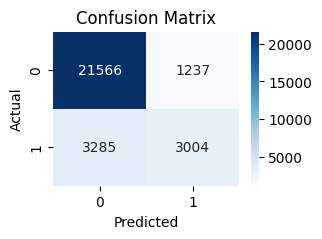

In [19]:
#ToDo:  compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(3,2))

# ToDo: Visualize the confusion matrix
sns.heatmap(cm, annot=True, annot_kws={"size": 10}, fmt='d', cmap="Blues", ax=ax)

# Set axis labels
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

# Set title
ax.set_title('Confusion Matrix')

# Display the plot
plt.show()


In [20]:
#We look at the coefficients, see what the model predictions are based on

#ToDo: get the coefficients of the logistic regression using the coef_ method in the logistic regression object
#There is a list within a list, so use [0] to take the inside list
coeffs = lr.coef_[0]
feature_names = list(x_test)

#We sort the coefficients and feature names together
cfs, feat_names = zip(*sorted(zip(coeffs, feature_names)))

for i in range(len(coeffs)):
    print("{0}: {1}".format(feat_names[i], cfs[i]))

Pressure3pm: -9.602813705255109
WindSpeed3pm: -1.78831497920703
Sunshine: -1.6729851207471795
MaxTemp: -1.598221506395878
WindSpeed9am: -1.5936608786830344
Evaporation: -0.4171108998190772
MinTemp: -0.07714000526705976
Cloud9am: 0.028228544575315175
Humidity9am: 0.37420118251413287
RainToday: 0.5494491743253492
Temp9am: 0.7605112253261667
Cloud3pm: 1.1669742570684403
Temp3pm: 1.2112523463971032
Rainfall: 2.6153118685646266
Humidity3pm: 5.161021116255867
Pressure9am: 5.535667754176356
WindGustSpeed: 6.420103603619229


**Precision/recall**

Precision and recall are characteristics of our model.<br>
<u>Precision </u>calculates how many of the data points that are classified as positive are true positives.<br>
<u>Recall</u> calculates how many of the positive data points have been classified as positive.<br>
They represent different aspects of the model performance.<br>

<img src="prec_recall.png" width="300" height="150">

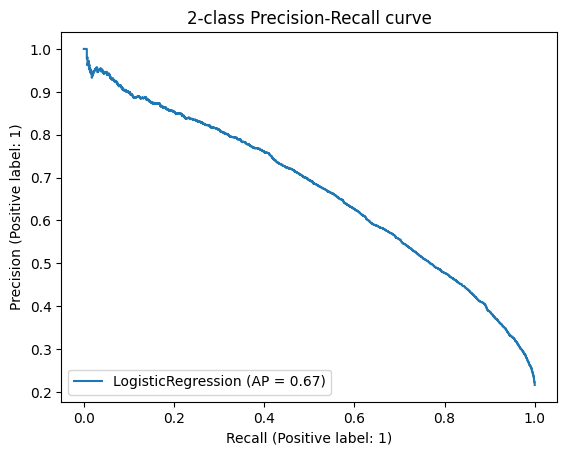

In [21]:
#ToDo: calculate the precision-recall curve
display = PrecisionRecallDisplay.from_estimator(
    lr, x_test, y_test, name="LogisticRegression")
_ = display.ax_.set_title("2-class Precision-Recall curve")

**F1 score**

The F1 score combines precision and recall using their <u>harmonic mean</u>, and maximizing the F1 score implies simultaneously maximizing both precision and recall. Thus, the F1 score has become the choice of researchers for evaluating their models in conjunction with accuracy. 

<img src="f1_1.png" width="200" height="100">

We can also rewrite it in terms of true positives, true negatives, false positives and false negatives:

<img src="f1_2.png" width="200" height="100">

In [22]:
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred, average='macro'))
print(f1_score(y_test, y_pred, average='micro'))
print(f1_score(y_test, y_pred, average='weighted'))

0.7378339774389074
0.8445620789220403
0.8327864538903921


**Area Under the Receiver Operating Characteristic Curve (ROC AUC)** <br>
<br>
ROC AUC is a curve that shows how easily we can separate our classes. <br>
<br>
The curve is computed by calculating the number true positives (correctly classified "positive" examples) and false positives (negative examples that have been classified as positive). <br>

We have not just one value, but a curve because we calculate those numbers for each possible probability threshold (from 0 to 1) that we use to separate the classes. <br>

<u>Example threshold</u>: 0.5 (if the probability is higher that 0.5, we assign a data point to a positive class.<br>
                   0 - everything is assigned to the positive class<br>
                   1 - everything is assigned to the negative class<br>

<img src="ROC_AUC.png" width="400" height="200">

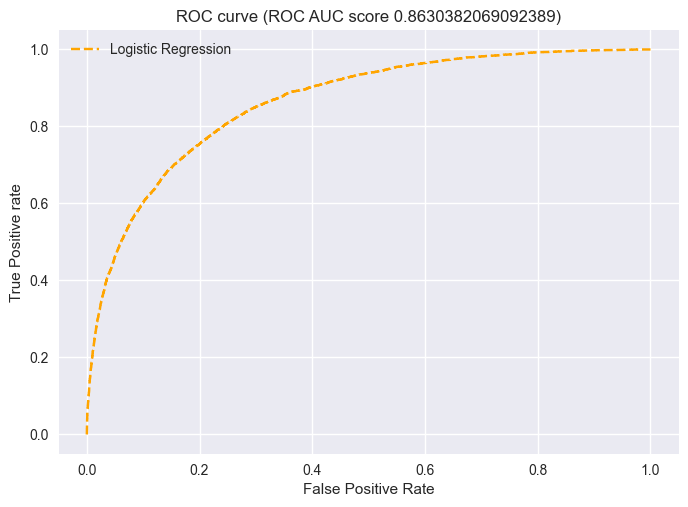

In [23]:
#Let's plot the ROC curve

#ToDo: use the metrics.roc_curve function to calculate the false positive rates into variable fpr, 
#true positives rates into variable tpr and thresholds into variable thresholds
fpr, tpr, thresholds = metrics.roc_curve(y_test, probs_y[:, 1], pos_label=1)
#ToDo: calculate the area under the ROC curve using the metrics.roc_auc_score function with parameters y_test 
#and the probabilistic predictions for the positive class
auc_score = metrics.roc_auc_score(y_test, probs_y[:, 1])


#Let's plot the ROC curve and print the ROC AUC score
plt.style.use('seaborn') 
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Logistic Regression')
plt.title('ROC curve (ROC AUC score {0})'.format(auc_score))
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate') 
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();


In [24]:
#BONUS EXCERCISE : improve model (hyperparameters?)